In [1]:
# DNN: deep neural network
import numpy as np
import tensorflow as tf

# tensorflow 2.0에 내장된 Keras 사용
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 사용 함수
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화

# tensorflow 1.x, Keras가 독립적으로 설치된 경우
# from keras.models import Sequential  # class
# from keras.models import load_model  # model 사용 함수
# from keras.layers import Dense       # class

print(tf.__version__)

2.0.0


In [2]:
# 데이터 2개씩 입력
x_train = np.array([[1, 5], [2, 6], [3, 7], [4, 8], [5, 9], [6, 10], [7, 11], [8, 12], [9, 13], [10, 14]])
print(x_train.shape)
print(x_train[0].shape)

(10, 2)
(2,)


In [3]:
# 1 * 2 = 2, 5 * 2 = 10
y_train = np.array([[2, 10], [4, 12], [6, 14], [8, 16], [10, 18], [12, 20], [14, 22], [16, 24], [18, 26], [20, 28]])
print(y_train.shape)

(10, 2)


### 퍼셉트론

In [4]:
# 파라미터(가중치, y절편) 특정 값으로 초기화 -> 정규분포에 맞춰서 난수 생성
tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=0)
# keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None)
# keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=0)
# tensorflow.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0, seed=None)
model = Sequential()
# model.add(Dense(60, input_dim=2, activation='linear'))
# (2, ): 1차원 배열 요소 2개
model.add(Dense(60, input_shape=(2, ), activation='linear'))
model.add(Dense(80, activation='linear')) # 입력: 60, 출력: 80
model.add(Dense(40, activation='linear')) # 입력: 80, 출력: 40
model.add(Dense(15, activation='linear'))
model.add(Dense(2, activation='linear'))  # 입력: 15, 출력: 2

model.compile(optimizer='adam', loss='mse')

hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                 epochs=35, batch_size=1)

Train on 8 samples, validate on 2 samples
Epoch 1/35
8/8 [==============================] - 1s 104ms/sample - loss: 124.8536 - val_loss: 87.1590
Epoch 2/35
8/8 [==============================] - 0s 3ms/sample - loss: 14.0504 - val_loss: 34.8961
Epoch 3/35
8/8 [==============================] - 0s 3ms/sample - loss: 17.7599 - val_loss: 23.3404
Epoch 4/35
8/8 [==============================] - 0s 3ms/sample - loss: 2.6520 - val_loss: 5.4649
Epoch 5/35
8/8 [==============================] - 0s 3ms/sample - loss: 4.1465 - val_loss: 8.4001
Epoch 6/35
8/8 [==============================] - 0s 3ms/sample - loss: 1.7113 - val_loss: 2.3266
Epoch 7/35
8/8 [==============================] - 0s 3ms/sample - loss: 0.7165 - val_loss: 1.6528
Epoch 8/35
8/8 [==============================] - 0s 3ms/sample - loss: 0.4718 - val_loss: 0.8298
Epoch 9/35
8/8 [==============================] - 0s 3ms/sample - loss: 0.1701 - val_loss: 0.1172
Epoch 10/35
8/8 [==============================] - 0s 3ms/sample - 

In [5]:
model.summary()
# Total params: 8,947

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 80)                4880      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                615       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 32        
Total params: 8,947
Trainable params: 8,947
Non-trainable params: 0
_________________________________________________________________


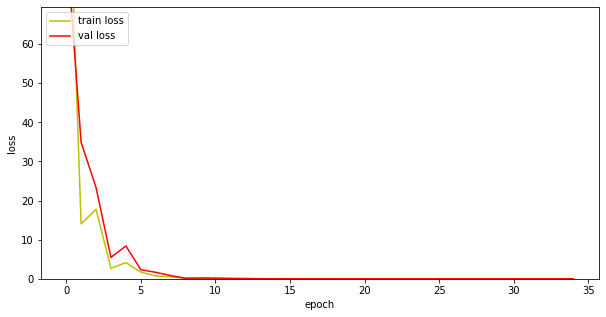

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 69.4939 ]) # 값을 반영하여 변경
# val_loss: 1386.4710 오차들의 합

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# 값이 떨어지면 학습이 되고 있다는 의미

In [7]:
# 모델 사용
x = np.array([[11, 19], [12, 20], [13, 21], [14, 22], [15, 23]])

pd = model.predict(x) # 모델 사용
print(pd.shape)
# print(pd)

(5, 2)


In [8]:
y = np.array([[22, 38], [24, 40], [26, 42], [28, 44], [30, 46]]) # 타겟
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.5f} {3:.5f}, 정제된값: {4:.0f} {5:.0f}'
    print(fmt.format(x[i], y[i], pd[i][0], pd[i][1], pd[i][0], pd[i][1]))

x: [11 19], 실제값: [22 38], 예측값: 22.23024 37.58459, 정제된값: 22 38
x: [12 20], 실제값: [24 40], 예측값: 24.23031 39.58471, 정제된값: 24 40
x: [13 21], 실제값: [26 42], 예측값: 26.23039 41.58484, 정제된값: 26 42
x: [14 22], 실제값: [28 44], 예측값: 28.23046 43.58495, 정제된값: 28 44
x: [15 23], 실제값: [30 46], 예측값: 30.23054 45.58507, 정제된값: 30 46


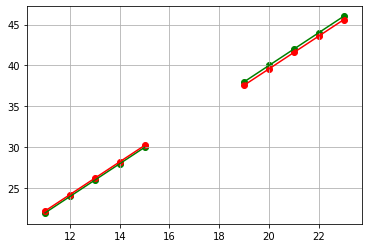

In [9]:
# 시각화2
# x: 11 --> y: 22, x: 12 --> y: 24
import matplotlib.pyplot as plt
%matplotlib inline  

plt.scatter(x, y, color='g')
plt.plot(x, y, color='g')
plt.scatter(x, pd, color='r')
plt.plot(x, pd, color='r')
plt.grid(True)
plt.show()

In [10]:
model.save('./Basic4.h5')